Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Strathmore\DSA Units\2nd Semester\DSA 8201 Research Methods for Data Science and Analytics\Project\student_dropout_data_with_additional_attributes.csv')

In [5]:
# Display the first 5 rows
df.head()

,Age,Gender,Num_Siblings,Family_Size,Family_Income,Parental_Education,Parent_Occupation,Access_to_Resources,Type_of_Housing,Grade_Math,...,Location,Dropout,Boarding_Status,Technology_Access,Socioeconomic_Status,Teacher_Student_Ratio,School_Infrastructure_Score,School_Funding_Level,Average_Class_Size,Average_Performance
0,17,Male,2,4,8.863559,Primary,Agriculture,Yes,Own,87.572424,...,Rural,False,Day-school,High,Middle,21.516851,89.025437,Low,35.506157,62.210390
1,18,Male,4,6,9.290234,Tertiary,Formal Sector,Yes,Own,45.049519,...,Rural,False,Day-school,Medium,Low,24.433649,31.354119,Low,38.799322,61.838993
2,16,Female,1,3,11.078113,Secondary,Agriculture,Yes,Own,56.853624,...,Urban,False,Day-school,Medium,Low,28.240244,28.424973,Low,40.632662,70.235653
3,18,Female,1,3,27.071631,Secondary,Formal Sector,Yes,Own,71.975120,...,Urban,False,Day-school,Medium,Middle,22.998542,77.266849,High,34.851073,73.847675
4,18,Male,6,8,0.448112,Primary,Formal Sector,No,Own,51.645974,...,Rural,True,Boarding,Medium,Low,19.377884,99.842347,High,46.116631,68.016078


Step 3: Inspect the Dataset  
3.1 Check Basic Information

In [7]:
# Check the shape of the dataset (rows, columns)
print(f"Dataset Shape: {df.shape}")

# Check column names and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

Dataset Shape: (9989, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            9989 non-null   int64  
 1   Gender                         9989 non-null   object 
 2   Num_Siblings                   9989 non-null   int64  
 3   Family_Size                    9989 non-null   int64  
 4   Family_Income                  9989 non-null   float64
 5   Parental_Education             9989 non-null   object 
 6   Parent_Occupation              9989 non-null   object 
 7   Access_to_Resources            9989 non-null   object 
 8   Type_of_Housing                9989 non-null   object 
 9   Grade_Math                     9989 non-null   float64
 10  Grade_Science                  9989 non-null   float64
 11  Grade_English                  9989 non-null   float64
 12  Overall_GPA           

In [27]:
# Check for duplicate rows again
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


3.2 Descriptive Statistics

In [9]:
# Get summary statistics for numerical columns
print(df.describe())

               Age  Num_Siblings  Family_Size  Family_Income   Grade_Math  \
count  9989.000000   9989.000000  9989.000000    9989.000000  9989.000000   
mean     16.499750      3.028431     5.028431      53.824537    59.966026   
std       1.709161      1.989256     1.989256     157.086460    14.874942   
min      14.000000      0.000000     2.000000       0.019815     8.680570   
25%      15.000000      1.000000     3.000000       6.287216    49.755131   
50%      17.000000      3.000000     5.000000      17.291818    59.921246   
75%      18.000000      5.000000     7.000000      48.549149    70.150262   
max      19.000000      6.000000     8.000000    8092.548866   125.348768   

       Grade_Science  Grade_English  Overall_GPA  Attendance_Rate  \
count    9989.000000    9989.000000  9989.000000      9989.000000   
mean       65.083411      70.475144    65.174860        79.929233   
std        14.794512      14.914683     8.474702         9.808424   
min         5.618988       7.0

In [10]:
# Get summary statistics for categorical columns
print(df.describe(include=['object']))

        Gender Parental_Education Parent_Occupation Access_to_Resources  \
count     9989               9989              9989                9989   
unique       2                  4                 4                   2   
top     Female          Secondary       Agriculture                 Yes   
freq      5006               3974              3999                5914   

       Type_of_Housing Participation_Extracurricular Mode_of_Transportation  \
count             9989                          9989                   9989   
unique               2                             2                      4   
top                Own                            No                Walking   
freq              6995                          5896                   3923   

       School_Type School_Quality School_Attendance_Policy  \
count         9989           9989                     9989   
unique           3              3                        3   
top          Mixed            Low         

Step 4: Data Cleaning  
4.1 Handle Missing Value       s
If there are missing values, decide how to handle them (e.g., drop or impute).

In [12]:
# Drop rows with missing values (if necessary)
df.dropna(inplace=True)

#Impute missing values in 'Family_Income' with the mean
df['Family_Income'].fillna(df['Family_Income'].mean(), inplace=True)

4.2 Handle Duplicates

In [14]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


4.3 Encode Categorical Variables  
Machine learning models require numerical input, so encode categorical variables.

In [16]:
# Encode binary categorical variables (e.g., Gender, Boarding_Status)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Boarding_Status'] = df['Boarding_Status'].map({'Boarding': 1, 'Day-school': 0})

# Encode multi-class categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['School_Type', 'Technology_Access', 'Socioeconomic_Status', 'School_Funding_Level'], drop_first=True)

In [29]:
# Encode 'Type_of_Housing' and 'Access_to_Resources'
df['Type_of_Housing'] = df['Type_of_Housing'].map({'Own': 1, 'Rented': 0})
df['Access_to_Resources'] = df['Access_to_Resources'].map({'Yes': 1, 'No': 0})

# Encode 'Parental_Education' and 'Parent_Occupation' using one-hot encoding
df = pd.get_dummies(df, columns=['Parental_Education', 'Parent_Occupation'], drop_first=True)

In [17]:
df.head()

,Age,Gender,Num_Siblings,Family_Size,Family_Income,Parental_Education,Parent_Occupation,Access_to_Resources,Type_of_Housing,Grade_Math,...,Average_Class_Size,Average_Performance,School_Type_Girls Only,School_Type_Mixed,Technology_Access_Low,Technology_Access_Medium,Socioeconomic_Status_Low,Socioeconomic_Status_Middle,School_Funding_Level_Low,School_Funding_Level_Medium
0,17,1,2,4,8.863559,Primary,Agriculture,Yes,Own,87.572424,...,35.506157,62.210390,False,False,False,False,False,True,True,False
1,18,1,4,6,9.290234,Tertiary,Formal Sector,Yes,Own,45.049519,...,38.799322,61.838993,False,True,False,True,True,False,True,False
2,16,0,1,3,11.078113,Secondary,Agriculture,Yes,Own,56.853624,...,40.632662,70.235653,False,True,False,True,True,False,True,False
3,18,0,1,3,27.071631,Secondary,Formal Sector,Yes,Own,71.975120,...,34.851073,73.847675,False,True,False,True,False,True,False,False
4,18,1,6,8,0.448112,Primary,Formal Sector,No,Own,51.645974,...,46.116631,68.016078,False,True,False,True,True,False,False,False


Step 5: Data Visualization  
5.1 Visualize Target Variable (Dropout)

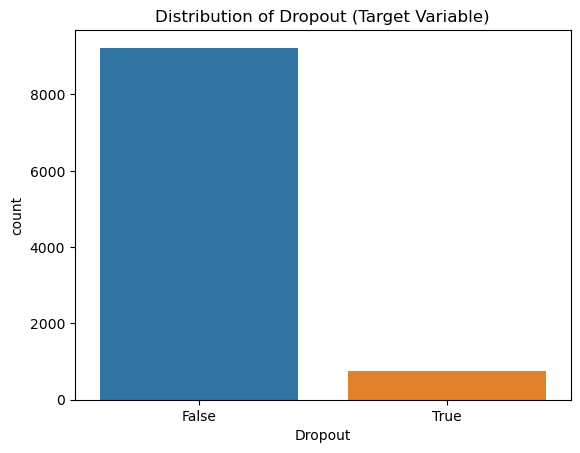

In [19]:
# Plot the distribution of the target variable
sns.countplot(x='Dropout', data=df)
plt.title('Distribution of Dropout (Target Variable)')
plt.show()

5.2 Visualize Numerical Features

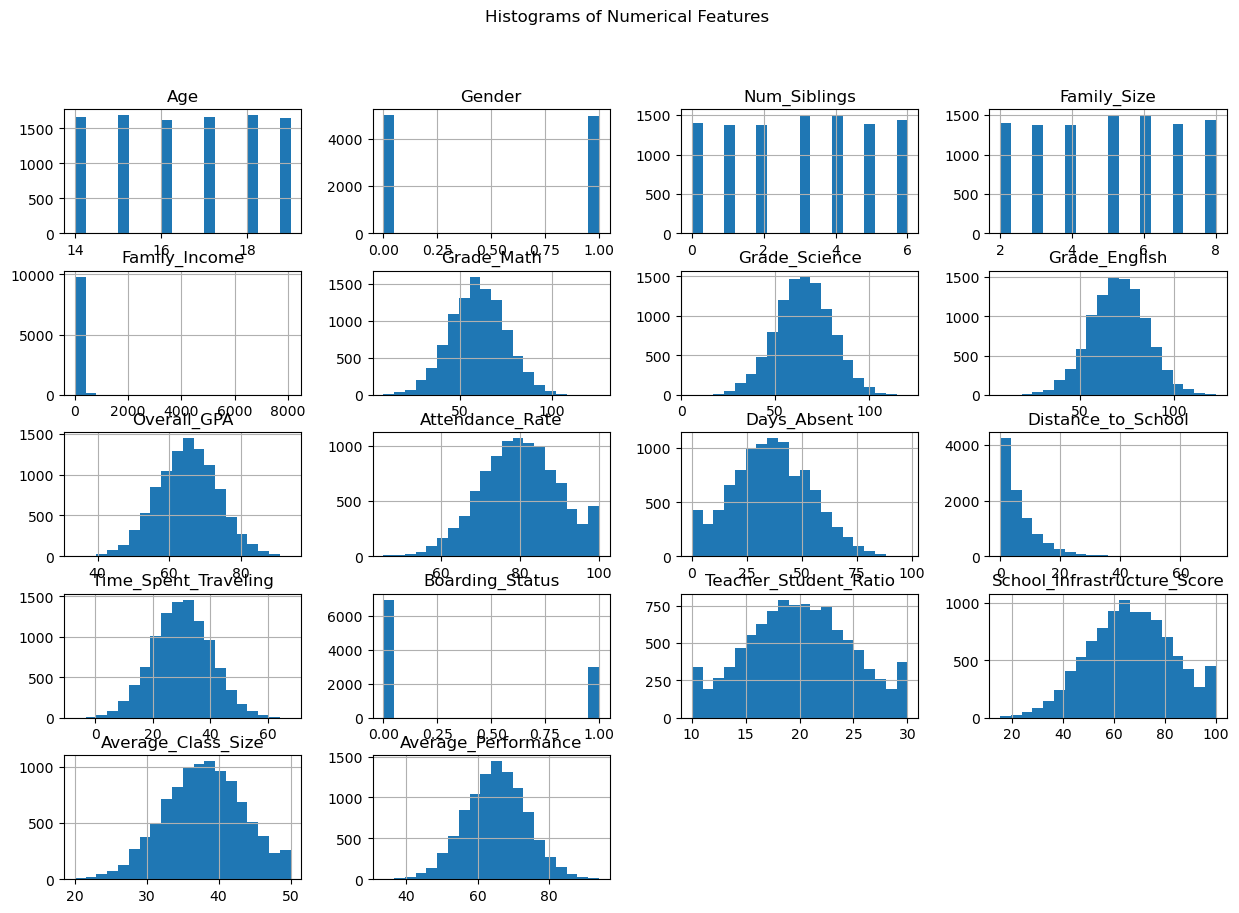

In [21]:
# Plot histograms for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

5.3 Visualize Categorical Features

AttributeError: 'numpy.bool_' object has no attribute 'startswith'

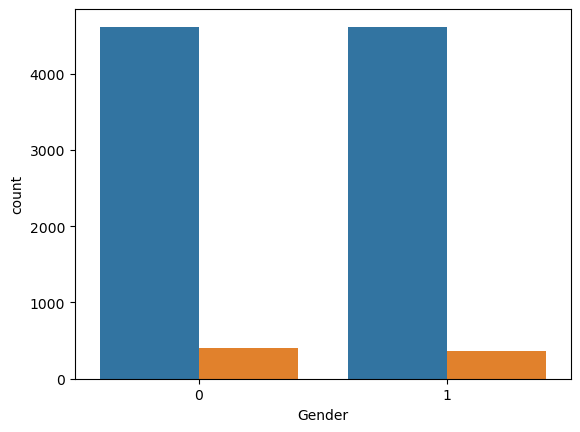

In [23]:
# Plot bar plots for categorical features
categorical_features = ['Gender', 'Boarding_Status', 'School_Type_Mixed', 'School_Type_Girls Only']
for feature in categorical_features:
    sns.countplot(x=feature, hue='Dropout', data=df)
    plt.title(f'Distribution of {feature} by Dropout')
    plt.show()

Step 7: Exploratory Data Analysis (EDA)   

7.1 Visualize Target Variable ('Dropout')

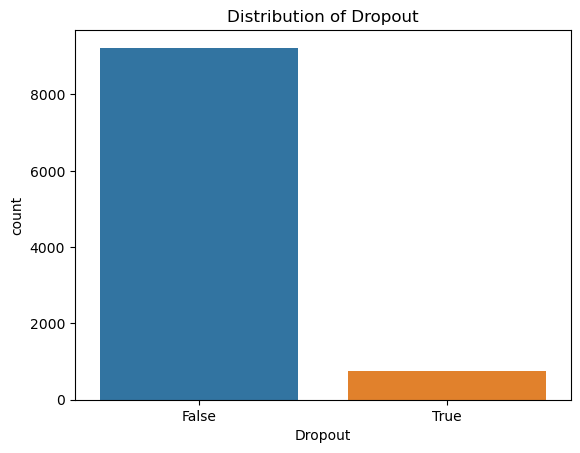

In [32]:
# Count plot for 'Dropout'
sns.countplot(x='Dropout', data=df)
plt.title('Distribution of Dropout')
plt.show()

7.2 Explore Feature Relationships

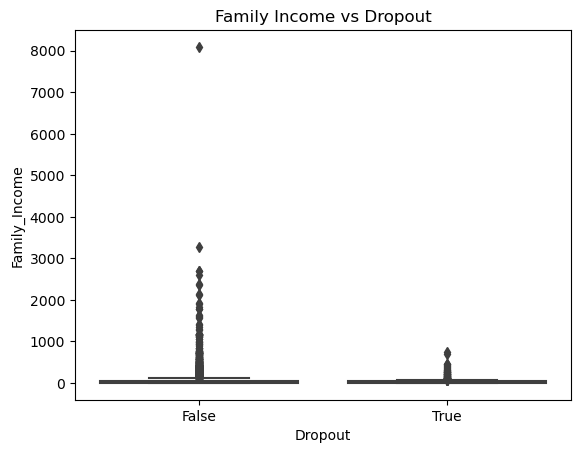

In [35]:
# Distribution of 'Family_Income' for dropout vs non-dropout
sns.boxplot(x='Dropout', y='Family_Income', data=df)
plt.title('Family Income vs Dropout')
plt.show()

7.3 Correlation Analysis

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


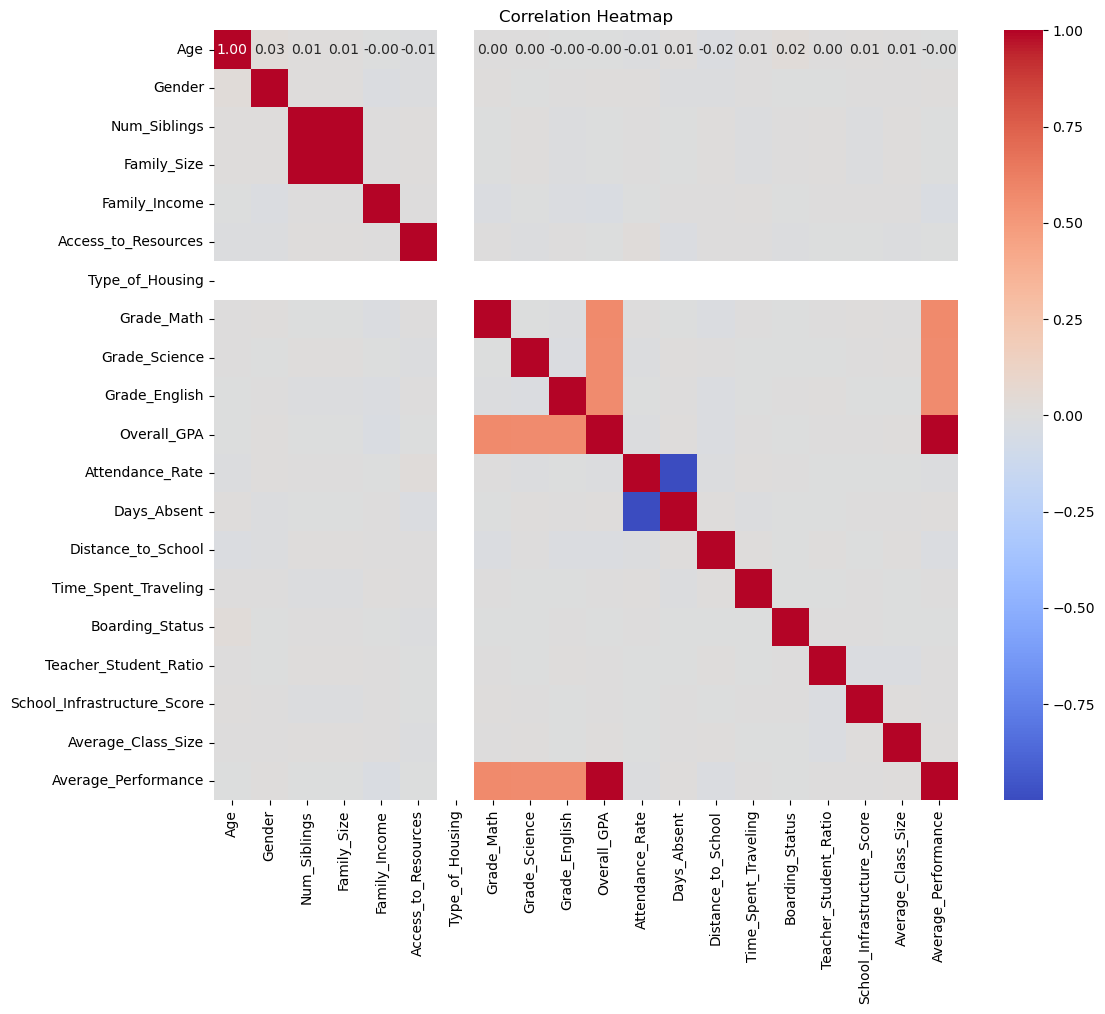

In [38]:
# Compute correlation matrix for numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numerical_cols].corr()

# Heatmap of correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

5.4 Correlation Heatmap

In [40]:
# Plot a correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 1200x800 with 0 Axes>

5.5 Pairplot for Key Features

In [ ]:
# Plot pairplot for key numerical features
sns.pairplot(df[['Family_Income', 'Attendance_Rate', 'Grade_Math', 'Grade_Science', 'Grade_English', 'Dropout']], hue='Dropout')
plt.suptitle('Pairplot of Key Numerical Features')
plt.show()

Step 6: Feature Engineering  
6.1 Create New Features 

In [ ]:
# Create a new feature for total grades
df['Total_Grades'] = df['Grade_Math'] + df['Grade_Science'] + df['Grade_English']

# Create a new feature for attendance percentage
df['Attendance_Percentage'] = df['Attendance_Rate']

6.2 Normalize/Scale Numerical Features  
Machine learning models perform better when numerical features are scaled.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
numerical_features = ['Family_Income', 'Grade_Math', 'Grade_Science', 'Grade_English', 'Attendance_Rate', 'Teacher_Student_Ratio', 'School_Infrastructure_Score', 'Average_Class_Size']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Step 7: Prepare Data for Modeling  
7.1 Separate Features and Target

In [ ]:
# Features (X)
X = df.drop('Dropout', axis=1)

# Target (y)
y = df['Dropout']

7.2 Split Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")

Step 8: Save the Cleaned Dataset

In [ ]:
df.to_csv('cleaned_student_dropout_data.csv', index=False)